In [1]:
import pandas as pd
from pathlib import Path

import json

TWITTER_BASE = Path('/data/blockchain-interoperability/blockchain-social-media/twitter-data/')

ids = pd.read_pickle(TWITTER_BASE/'snapshots/id.pkl')
timestamps = pd.to_datetime(pd.read_pickle(TWITTER_BASE/'snapshots/timestamp_ms.pkl'),unit='ms')
kmeans_clusters = json.load(open(TWITTER_BASE/'kmeans_clusters/kmeans_init_clusters.json'))
df = pd.concat([ids,timestamps],axis=1)


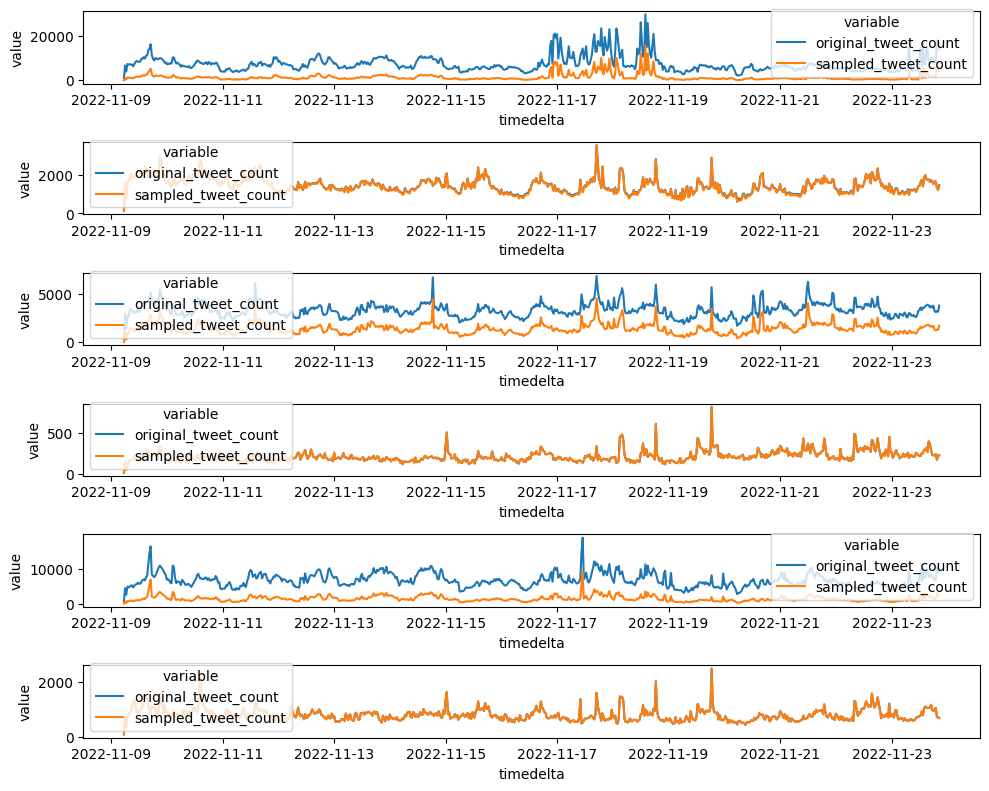

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axes = plt.subplots(nrows = len(kmeans_clusters),figsize=(10,8))

samples = []

for cluster_id, ids in kmeans_clusters.items():
    cluster_rows = df.iloc[ids]
    original_dist = []
    weighted_by_time = []
    for timestamp,subgroup in cluster_rows.resample('30min', on='timestamp_ms'):
        original_dist.append((timestamp,len(subgroup)))
        subgroup = subgroup.copy()
        subgroup['weight'] = len(subgroup)
        weighted_by_time.append(subgroup)
    
    original_dist = pd.DataFrame(original_dist,columns=['timedelta','original_tweet_count'])

    time_weights = pd.concat(weighted_by_time)

    if len(cluster_rows) > 1e6:
        random_sample = cluster_rows.sample(1000000,weights=pd.concat(weighted_by_time).weight)
    else:
        random_sample = cluster_rows

    sampled_dist = pd.DataFrame([
        (timestamp,len(subgroup))
        for timestamp,subgroup in random_sample.resample('30min',on='timestamp_ms')
    ],columns=['timedelta','sampled_tweet_count'])
    

    samples.append(random_sample)

    # merge the two distributions
    distributions = original_dist.merge(sampled_dist,on='timedelta')
        
    sns.lineplot(
        distributions.melt(id_vars='timedelta'),
        x = 'timedelta',
        y = 'value',
        hue='variable',
        ax = axes[int(cluster_id)]
    )

    # break

fig.tight_layout()

In [55]:
from pathlib import Path

resampled_base = Path('/data/blockchain-interoperability/blockchain-social-media/twitter-data/kmeans_clusters_resampled/')

for k,k_ids in enumerate(samples):
    json.dump(k_ids['id'].values.tolist(), open(resampled_base/f'{k}_ids.json','w'))

In [117]:
# copy original config of reindex

reindex_configs = Path('../tools/reindex/')
config = json.load(open('../tools/reindex/config.json'))

for k,k_ids in enumerate(samples):
    config['elasticsearch_index_name'] = f'blockchain-cluster-{k}'
    idlist = k_ids['id'].values.tolist()
    cluster_folder = reindex_configs/f'cluster_{k}'

    cluster_folder.mkdir(parents=True,exist_ok=True)

    for i in range(0,len(k_ids)//50000 + 1):
        config['elasticsearch_query'] = {
            'terms': {
                '_id': idlist[i*50000:(i+1)*50000]
            }
        }

        json.dump(config, open(cluster_folder/f'{i:02d}.json','w'))

    #     break
    # break





In [111]:
len(k_ids)

596521

In [118]:
for s in samples: print(len(s))

1000000
1000000
1000000
160048
1000000
596521


In [98]:
config

{'py/object': 'config.Config',
 'elasticsearch_host': 'http://idea-vm-elasticsearch:9200',
 'elasticsearch_verify_certs': False,
 'elasticsearch_index_name': 'blockchain-cluster-0',
 'elasticsearch_timeout_secs': 120,
 'max_docs': 1000000,
 'elasticsearch_query': {'query': {'terms': {'_id': [1595509139811274760,
     1593100090050490368,
     1593028458883723264,
     1594290427372654592,
     1593319189183332360,
     1590766354462015489,
     1593019342073266177,
     1595437066594443267,
     1595102686692937729,
     1593427230360731651,
     1592509776201932805,
     1591114467420831744,
     1595440822648029192,
     1593319035508330496,
     1590394989749891080,
     1593587315791826945,
     1593597974516580352,
     1593968027346804738,
     1590815650280534017,
     1591803048049115138,
     1593366561213095937,
     1593469505421852672,
     1595462641882914818,
     1591236480847949824,
     1594055320632004608,
     1591351645719625731,
     1591742639162142720,
     15937